# Car Price Prediction in German Used Car Market- Regression Models

## Objective 
The goal of this project is to predict the resale price of used cars in the GErman market based on vehicle features such as mileage, power, and age. We'll explore different regression models and evaluate their performance to determine the most effective approach for price prediction. 

In [6]:
!pip install xgboost

### Tasks Covered
- Train-test split and data preprocessing
- Linear, Ridge and Lasso Regression
- Random Forest and K-Nearest Neighbours
- Model Evaluation using MSE and R$^2$

### Imports and Setups

In [9]:
# BASIC LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# MACHINE LEARNING

from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
from xgboost import  XGBRegressor 
# METRICS

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle

In [10]:
df_main=pd.read_csv("cars_dataset_cleaned.csv")
df_main.head(3)

,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,alfa-romeo,Alfa Romeo GTV,red,01.10.1995,1995.0,1300.0,148.0,201.0,Manual,Petrol,10.0,260.00,1605000.0,2.0 V6 TB
1,alfa-romeo,Alfa Romeo Spider,black,01.07.1995,1995.0,4900.0,110.0,150.0,Manual,Petrol,9.0,225.00,1895000.0,2.0 16V Twin Spark L
2,alfa-romeo,Alfa Romeo 164,red,01.11.1996,1996.0,17950.0,132.0,179.0,Manual,Petrol,7.0,52.15,961270.0,"3.0i Super V6, absoluter Topzustand !"


### Feature Selection and Preprocessing

In [12]:
features=["year", "power_ps", "fuel_consumption_g_km", "mileage_in_km"]
target=["price_in_euro"]

In [13]:
X=df_main[features].dropna()
y=df_main.loc[X.index, target]

In [14]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=1)
print("The number of training samples are", X_train.shape[0])
print("The number of testing samples are", X_test.shape[0])

The number of training samples are 178536
The number of testing samples are 44635


In [15]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

### Linear Regression

Linear Regression is a simple and interpretable model which assumes a straight line relationship between the independent and target variables. \
**When to use?**
- Data has a linear trend (straight-line-pattern)
- Relationships are not too complex


In [17]:
lr=LinearRegression()
lr.fit(X_train_scaled, y_train)
y_hat=lr.predict(X_test_scaled)

In [18]:
print("\n🔹 Linear Regression")
print("MAE:", mean_absolute_error(y_test, y_hat))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_hat)))
print("R²:", r2_score(y_test, y_hat))


🔹 Linear Regression
MAE: 8948.275075810592
RMSE: 21069.910508093028
R²: 0.5453687669590156


### Ridge Regresssion (L2 Regularization)
- A way to improve linear regression models when dealing with multicollinearity, which is when independent variables are highly correlated.
- Minimize error and shrink large weights
- We add penalty to prevent overfitting (model fitting noise/randomness)\
**When to use**
  - When we have many features
  - The features are corelated with each other (multicollinearity)

In [20]:
ridge=Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
ridge_pred=ridge.predict(X_test_scaled)

print("\n🔹 Ridge Regression")
print("MAE:", mean_absolute_error(y_test, ridge_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, ridge_pred)))
print("R²:", r2_score(y_test, ridge_pred))



🔹 Ridge Regression
MAE: 8948.241094840796
RMSE: 21069.90859164242
R²: 0.5453688496625717


### Lasso Regression

- Type of LR that uses L1 regularization to penalize the absolute size of the regression coefficients.
- Shrinks some coefficients exactly to zero.

In [22]:
lasso=Lasso (alpha=0.1)
lasso.fit(X_train_scaled, y_train)
lasso_pred=lasso.predict(X_test_scaled)
print("\n🔹 Lasso Regression")
print("MAE:", mean_absolute_error(y_test, lasso_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, lasso_pred)))
print("R²:", r2_score(y_test, lasso_pred))


🔹 Lasso Regression
MAE: 8948.23382186841
RMSE: 21069.90819410432
R²: 0.5453688668181471


### K-Nearest Neighbours

K-Nearest Neighbors (KNN) is a simple, intuitive machine learning algorithm used for classification and regression.
Main idea:

- To predict a point, look at the K closest points in the training data.
- For regression → take the average of their values.
- For classification → take a majority vote (which class appears most among the neighbors).

In [24]:
knn = KNeighborsRegressor(n_neighbors=5) 
knn.fit(X_train_scaled, y_train)
pred_knn = knn.predict(X_test_scaled)
print("\n🔹 K-Nearest Neighbors Regression")
print("MAE:", mean_absolute_error(y_test, pred_knn))
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred_knn)))
print("R²:", r2_score(y_test, pred_knn))


🔹 K-Nearest Neighbors Regression
MAE: 5010.990679959673
RMSE: 14025.776816501475
R²: 0.7985405081177717


### XGBoost Regressor
-

In [26]:
xgboost_model = xgb.XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42,verbosity=0)
xgboost_model.fit(X_train_scaled, y_train)
pred_xgb = xgboost_model.predict(X_test_scaled)
print("\n🔹 XGBoost Regression")
print("MAE:", mean_absolute_error(y_test, pred_xgb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred_xgb)))
print("R²:", r2_score(y_test, pred_xgb))


🔹 XGBoost Regression
MAE: 5506.585593214406
RMSE: 15902.600390960111
R²: 0.7410176396369934


### Cross Validation (5-Fold)

In [28]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "K-Nearest Neighbours":KNeighborsRegressor(n_neighbors=5), 
    "XGBoost Regressor": xgb.XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
}

for name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
    print(f"\n🔹 {name}")
    print("Mean R²:", scores.mean())
    print("All R² Scores:", scores)


🔹 Linear Regression
Mean R²: 0.46117617976039904
All R² Scores: [0.27076807 0.52230469 0.52132002 0.44011126 0.55137686]

🔹 Ridge Regression
Mean R²: 0.4611762220920518
All R² Scores: [0.27076792 0.52230488 0.52132023 0.44011119 0.55137689]

🔹 Lasso Regression
Mean R²: 0.4611762167063901
All R² Scores: [0.27076792 0.52230481 0.52132024 0.44011118 0.55137693]

🔹 K-Nearest Neighbours
Mean R²: 0.6816674164053006
All R² Scores: [0.44097679 0.74557771 0.76919439 0.66970199 0.7828862 ]

🔹 XGBoost Regressor
Mean R²: 0.5361129403114319
All R² Scores: [0.45499802 0.16032445 0.72459066 0.62141919 0.71923238]


### Hyperparameters Tunning

#### Ridge Regression

In [31]:
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='r2')
ridge_grid.fit(X_train_scaled, y_train)
print("\nBest Ridge alpha:", ridge_grid.best_params_)
print("Best Ridge R²:", ridge_grid.best_score_)


Best Ridge alpha: {'alpha': 100}
Best Ridge R²: 0.4611802156622288


#### Lasso Regression

In [33]:
lasso_params = {'alpha': [0.001, 0.01, 0.1, 1, 10]}

lasso_grid = GridSearchCV(Lasso(max_iter=5000), lasso_params, cv=5, scoring='r2')
lasso_grid.fit(X_train_scaled, y_train)

print("\nBest Lasso alpha:", lasso_grid.best_params_)
print("Best Lasso R²:", lasso_grid.best_score_)


Best Lasso alpha: {'alpha': 10}
Best Lasso R²: 0.46117913269180033


#### K-Nearest Neighbours

In [35]:
knn_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn_grid = GridSearchCV(knn, knn_params, cv=5, scoring='r2')
knn_grid.fit(X_train_scaled, y_train)
print("Best KNN parameters:", knn_grid.best_params_)
print("Best KNN R²:", knn_grid.best_score_)

Best KNN parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Best KNN R²: 0.7202701118445332


#### XGBoost Regression

In [37]:
xgb_params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 1.0]
}
xgb_model = XGBRegressor(random_state=42)
xgb_grid = GridSearchCV(xgb_model, xgb_params, cv=5, scoring='r2')
xgb_grid.fit(X_train_scaled, y_train)
print("Best XGBoost Parameters:", xgb_grid.best_params_)
print("Best XGBoost R² Score:", xgb_grid.best_score_)

Best XGBoost Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}
Best XGBoost R² Score: 0.6558852672576905


In [38]:
results = {
    "Linear Regression": [mean_absolute_error(y_test, y_hat), np.sqrt(mean_squared_error(y_test, y_hat)), r2_score(y_test, y_hat)],
    "Ridge Regression": [mean_absolute_error(y_test, ridge_pred), np.sqrt(mean_squared_error(y_test, ridge_pred)), r2_score(y_test, ridge_pred)],
    "Lasso Regression": [mean_absolute_error(y_test, lasso_pred), np.sqrt(mean_squared_error(y_test, lasso_pred)), r2_score(y_test, lasso_pred)],    
    "K-Nearest Neighbors": [mean_absolute_error(y_test, pred_knn), np.sqrt(mean_squared_error(y_test, pred_knn)), r2_score(y_test, pred_knn)],
    "XGBoost": [mean_absolute_error(y_test, pred_xgb), np.sqrt(mean_squared_error(y_test, pred_xgb)), r2_score(y_test, pred_xgb)]
}

results_df = pd.DataFrame(results, index=['MAE', 'RMSE', 'R²']).T.round(2)
print("\n📋 Model Comparison Table:")
display(results_df)


📋 Model Comparison Table:


,MAE,RMSE,R²
Linear Regression,8948.28,21069.91,0.55
Ridge Regression,8948.24,21069.91,0.55
Lasso Regression,8948.23,21069.91,0.55
K-Nearest Neighbors,5010.99,14025.78,0.80
XGBoost,5506.59,15902.60,0.74


The best model according to our results is **K-Nearest Neighbours (KNN Model)** because:
- Lowest MAE (much smaller than other models)
- Lowest RMSE (much smaller than other models)
- Highest R-squared (closer to 1)

### Visualization of the Results

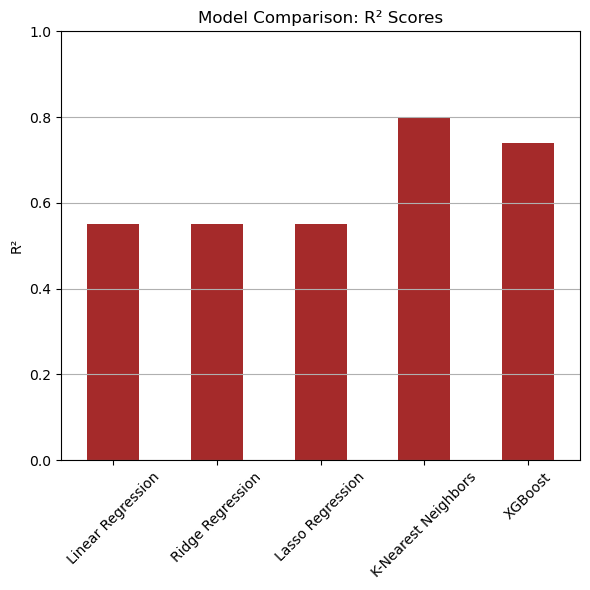

In [67]:
plt.figure(figsize=(6,6))
results_df['R²'].plot(kind='bar', color='brown')
plt.title("Model Comparison: R² Scores")
plt.ylabel("R²")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Model comparision.pdf")
plt.show()